### Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26
0,Casos nuevos con sintomas,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,4320.0,4060.0,5016.0,4564.0,4181.0,3710.0,3078.0,3020.0,3778.0,3422.0
1,Casos totales,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,220628.0,225103.0,231393.0,236748.0,242355.0,246963.0,250767.0,254416.0,259064.0,263360.0
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3615.0,3841.0,4093.0,4295.0,4479.0,4502.0,4505.0,4731.0,4903.0,5068.0
4,Casos activos,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,35082.0,34821.0,35809.0,35844.0,37307.0,37064.0,35692.0,34592.0,34834.0,34861.0
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,437.0,383.0,599.0,418.0,594.0,399.0,336.0,264.0,423.0,413.0
6,Casos nuevos totales,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,4757.0,4475.0,6290.0,5355.0,5607.0,4608.0,3804.0,3649.0,4648.0,4296.0
7,Casos activos por FD,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,75346.0,106811.0,108894.0,109003.0,108205.0,108117.0,108008.0,105920.0,104972.0,102514.0
8,Casos activos por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35082.0,34821.0,35809.0,35844.0,37307.0,37064.0,35692.0,34592.0,34834.0,34861.0
9,Casos recuperados por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181931.0,186441.0,191491.0,196609.0,200569.0,205397.0,210570.0,215093.0,219327.0,223431.0


In [3]:
def dia_cambio_metodologia(X,Y):
    plt.text(X, Y, 'Cambio de metodologia')

In [4]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
def Graph(name_item):
    data_by_item = data[(data.Item == name_item)].values
    Y            = np.delete(data_by_item, 0)
    X            = data.columns[1:]
    plt.figure(figsize=(20,10))
    plt.plot(X, Y, 'b')
    plt.plot(X, Y, 'bo')
    labelonbars([X[len(X)-1]], [Y[len(X)-1]])
    #dia_cambio_metodologia('2020-04-29',770)
    plt.xlabel('Fecha')
    plt.ylabel(name_item)
    plt.title(name_item)
    plt.grid()
    #plt.yscale('log')
    plt.xticks(X, rotation='vertical')
    plt.show()

## Casos totales

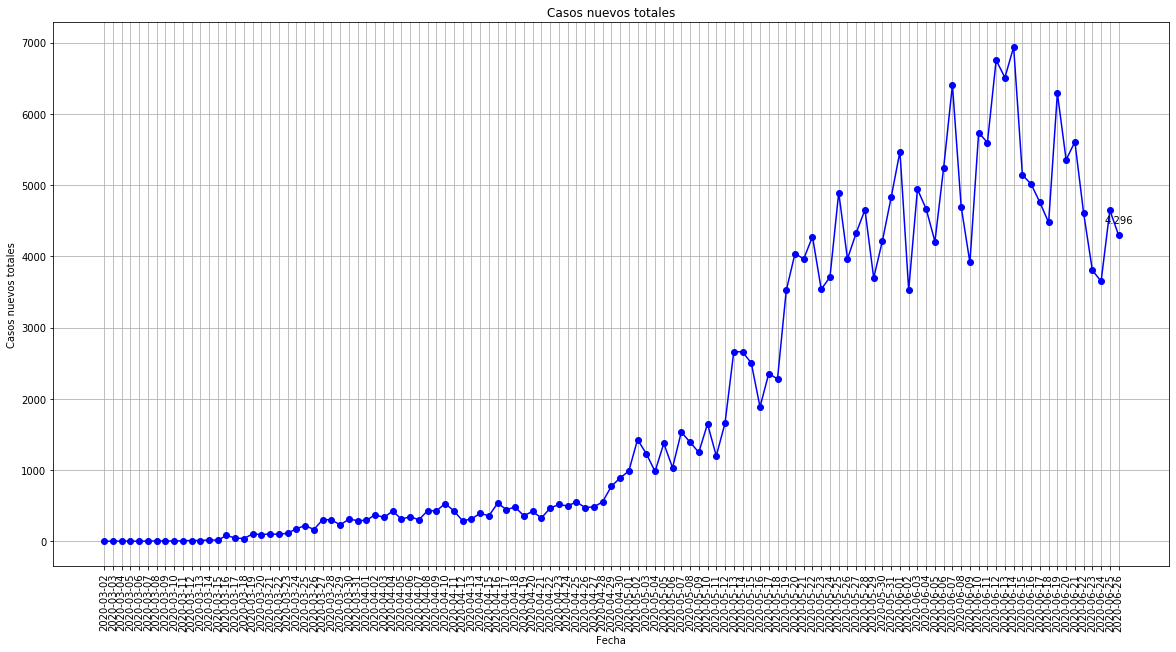

In [5]:
Graph("Casos nuevos totales")

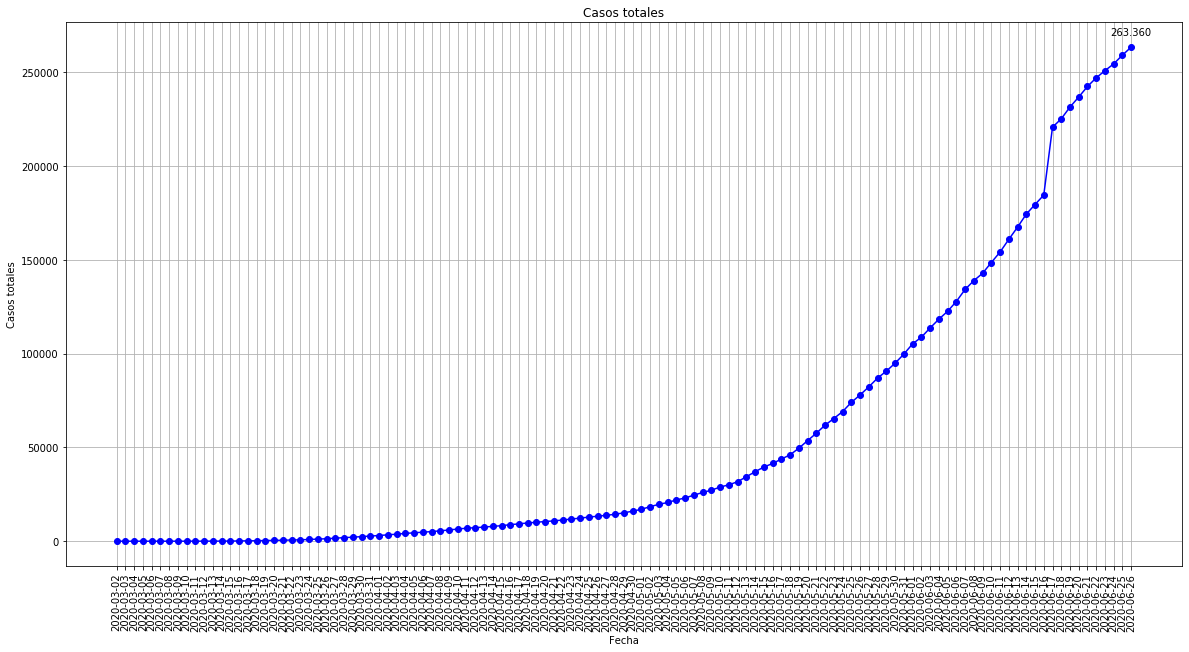

In [6]:
Graph("Casos totales")

In [7]:
#Graph("Casos recuperados")

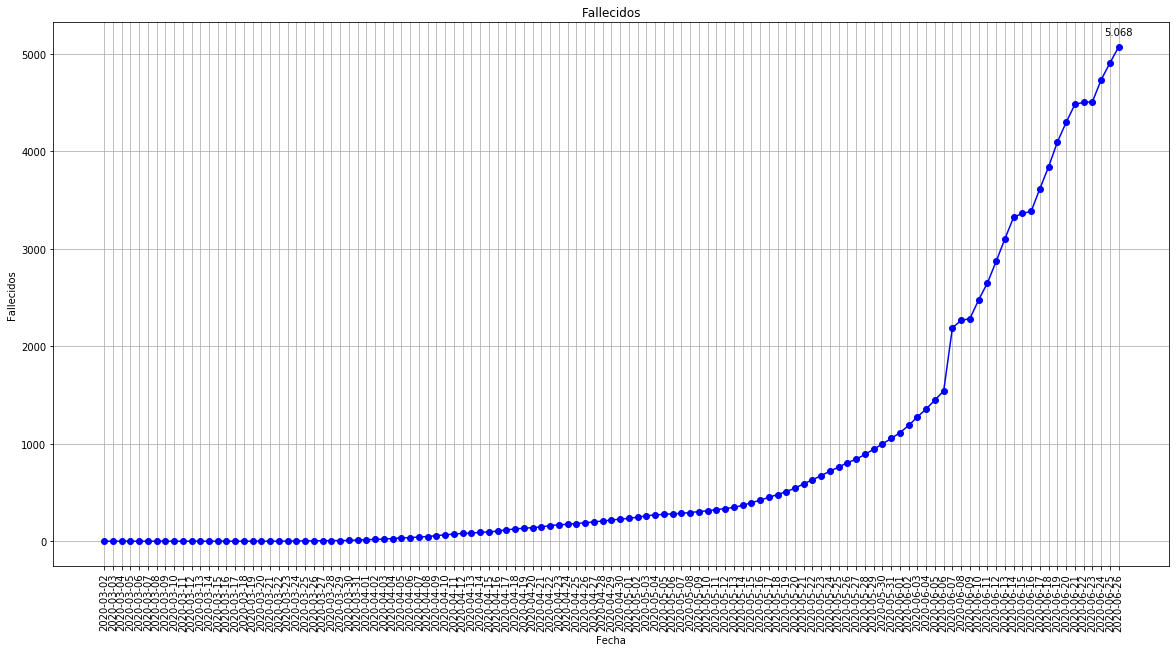

In [8]:
Graph("Fallecidos")

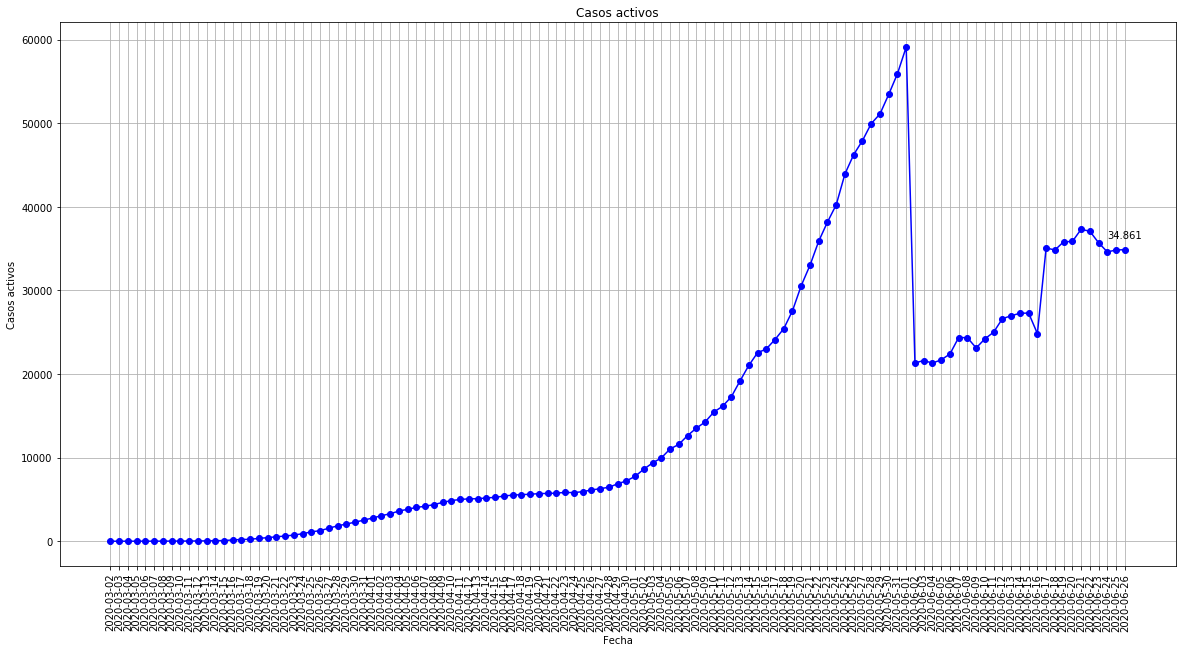

In [9]:
Graph("Casos activos")

## Regresión polinomica casos acumulados

In [10]:
fechas = data.columns[1:]
casos_totales = data[data["Item"]=="Casos totales"].values[0][1:]
dias          = [i for i in range (len(casos_totales))]
df = pd.DataFrame({
    'fecha': fechas,
    'dias': dias,
    'casos totales': casos_totales
})
df.tail(10)

,fecha,dias,casos totales
96,2020-06-06,96,127745
97,2020-06-07,97,134150
98,2020-06-08,98,138846
99,2020-06-09,99,142759
100,2020-06-10,100,148496
101,2020-06-11,101,154092
102,2020-06-12,102,160846
103,2020-06-13,103,167355
104,2020-06-14,104,174293
105,2020-06-15,105,179436


In [11]:
X = df[["dias"]]
Y = df[["casos totales"]]

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=9)
X_data = poly.fit_transform(X)

In [14]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm.score(X_data, Y)

0.9999058217282115

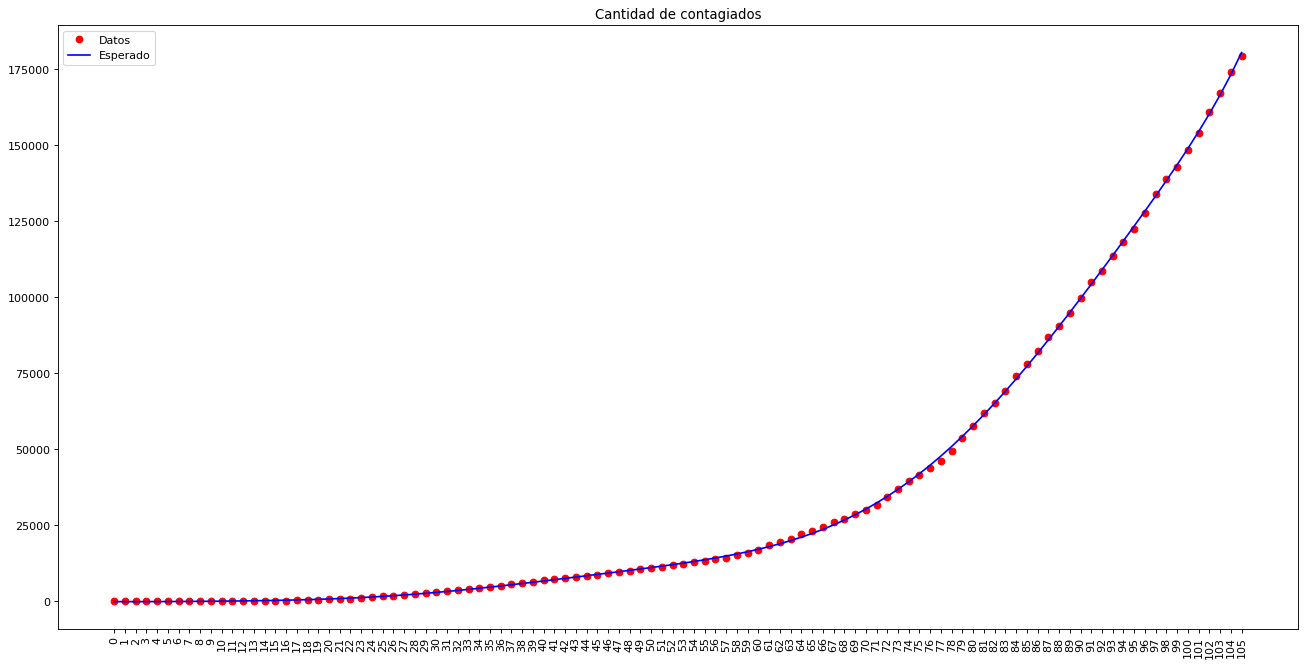

In [16]:
%matplotlib inline
Y_predict = lm.predict(X_data)
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, "ro")
plt.plot(X, Y_predict, color="blue")
plt.xticks(X.values.tolist(), rotation='vertical')
plt.legend(["Datos", "Esperado"])
plt.title("Cantidad de contagiados")
plt.show()

## Media de los errores

In [17]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)

In [18]:
df["Casos totales predict"] = Y_predict
df["Casos totales predict"] = df["Casos totales predict"].astype(int)

In [19]:
mse = mean_squared_error(y_true = Y, y_pred = Y_predict)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
rmse

474.9264063610512

## Predicción

In [20]:
for i in range(len(df)-1, len(df)+2):
    prediccion   = int(lm.predict(poly.fit_transform([[i]])))
    prediccion_0 = prediccion - int(rmse)
    prediccion_1 = prediccion + int(rmse)
    
    prediccion_0 = '{:,}'.format(int(prediccion_0)).replace(',', '.')
    prediccion_1 = '{:,}'.format(int(prediccion_1)).replace(',', '.')
    
    
    if i == len(df) - 1:
        print ("Hoy:    " + str(prediccion_0) + " - " + str(prediccion_1) + " infectados aprox")
    else:
        print ("Día "+ str(i)+ ": "  + str(prediccion_0) + " - " + str(prediccion_1) + " infectados aprox.")

Hoy:    180.057 - 181.005 infectados aprox
Día 106: 188.081 - 189.029 infectados aprox.
Día 107: 197.025 - 197.973 infectados aprox.
